In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
#importing the dataset
import os

file_path = "/Users/hatemelgenedy/Desktop/AI and Data Science Microsoft course/Projects/S& P 500 dataset/sp500_index.csv"

if not os.path.exists(file_path):
	raise FileNotFoundError(f"CSV file not found at {file_path}")

# read the CSV; skip malformed lines if any
df = pd.read_csv(file_path, on_bad_lines='skip')
df.head(6)

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
5,2014-12-30,2080.35


In [ ]:
#installing the ydata-profiling library to generate a profiling report of the dataset
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="S&P 500 Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 12.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# save the report as an HTML file
profile.to_file("S&P_500_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#This cell checks for missing values in each column of the dataset by summing the number of null entries, helping to identify any data quality issues that may need to be addressed before analysis or modeling.
df.isnull().sum()

Date      0
S&P500    0
dtype: int64

In [ ]:
#This cell checks for duplicate rows in the dataset by using the duplicated() method, which returns a boolean Series indicating whether each row is a duplicate of a previous row. The sum() function then counts the total number of duplicate rows, which can help identify any redundant data that may need to be removed.
duplicates = df . duplicated().sum()
print(duplicates)

0


In [ ]:
# checking the shape of the dataset to understand how many rows and columns it contains, which is essential for understanding the size and structure of the data before performing any analysis or modeling.
df.shape

(2517, 2)

In [ ]:
#
print(df.columns)

Index(['Date', 'S&P500'], dtype='object')


In [149]:

companies_file_path = "/Users/hatemelgenedy/Desktop/AI and Data Science Microsoft course/Projects/S& P 500 dataset/sp500_companies.csv"

df = pd.read_csv(companies_file_path, on_bad_lines='skip')


df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")
df["Marketcap"] = pd.to_numeric(df["Marketcap"], errors="coerce")
df = df.dropna(subset=["Weight", "Marketcap"]).reset_index(drop=True)

<Axes: >

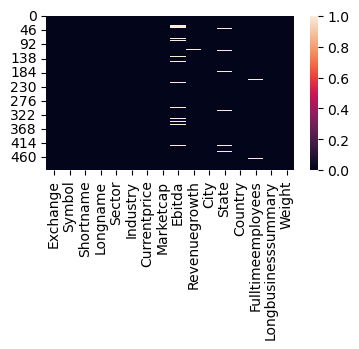

In [150]:
plt.figure(figsize = (4,2))
sns.heatmap(df.isnull())

In [151]:
null_percentage = df.isnull()/df.shape[0]*100
null_percentage

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [152]:
df.shape

(502, 16)

In [153]:
def iqr_bounds(s, k=1.5):
  q1,q3 = s.quantile(0.25) , s.quantile(0.75)
  iqr = q3 - q1
  return q1 - k*iqr , q3 +k*iqr


df["log10_mcap"] = np.log10(df["Marketcap"].astype(float))


w_low, w_high = iqr_bounds(df["Weight"])
m_low , m_high = iqr_bounds(df["log10_mcap"])

mask_w = (df["Weight"] <w_low) | (df ["Weight"] > w_high)
mask_m = (df["log10_mcap"] < m_low) | (df["log10_mcap"] > m_high)
mask_any =  mask_w | mask_m

df["Outlier_Weight"] = mask_w
df["Outlier_Mcaplog"] = mask_m
df["Outlier_Any"] = mask_any

label_col = "Shortname" if "Shortname" in df.columns else ("Longname" if "Longname" in df.columns else "Symbol")
outliers = df.loc[mask_any , ["Symbol" , label_col , "Weight" , "Marketcap"]]

print("IQR thresholds :")
print(f" Weight :  low = {w_low : .3f} , high = {w_high :.3f}")
print("\nOutier countd : \n" , df[["Outlier_Weight" , "Outlier_Mcaplog" , "Outlier_Any"]] )



IQR thresholds :
 Weight :  low = -0.001 , high = 0.003

Outier countd : 
      Outlier_Weight  Outlier_Mcaplog  Outlier_Any
0              True             True         True
1              True             True         True
2              True             True         True
3              True             True         True
4              True             True         True
..              ...              ...          ...
497           False            False        False
498           False            False        False
499           False            False        False
500           False            False        False
501           False            False        False

[502 rows x 3 columns]


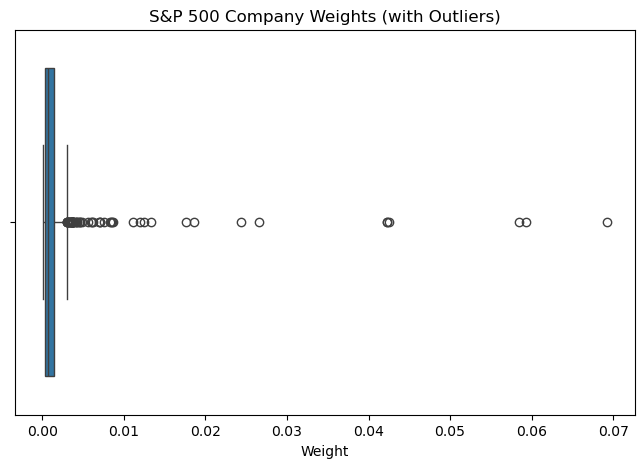

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Weight"])
plt.title("S&P 500 Company Weights (with Outliers)")
plt.xlabel("Weight")
plt.show()

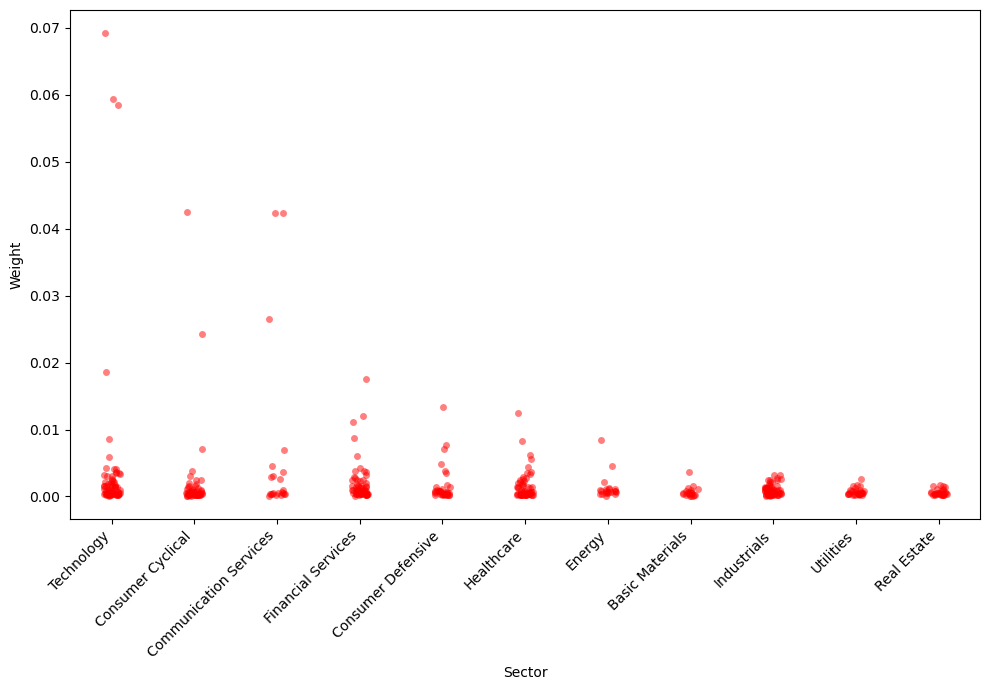

In [185]:

plt.figure(figsize = (10,7))
sns.stripplot(data = df , x = 'Sector' , y = 'Weight' , color = 'r' , jitter = True , alpha = 0.5)

plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()

In [156]:
model = LinearRegression()

In [157]:
x = df[['Sector']]
y = df[['Weight']]

In [158]:
X = df.drop(columns = ['Sector'])
y = df[['Weight']]

In [159]:
df_clean = df.dropna(subset = ["Weight", "Sector"]).reset_index(drop = True)
X = df_clean[["Sector"]].to_numpy()
y = df_clean[["Weight"]].to_numpy()


In [160]:
X = pd.get_dummies(df[['Sector']], drop_first=True)
y = df[['Weight']].apply(pd.to_numeric, errors='coerce')
mask = y['Weight'].notna()
X, y = X.loc[mask], y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

In [161]:
X = pd.get_dummies(df[['Sector']], drop_first = True)
y = pd.to_numeric(df['Weight'], errors = 'coerce')

In [162]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)


In [163]:
print('80% input traning data :' , X_train.shape)
print('20% input testing data :' , X_test.shape)

80% input traning data : (401, 10)
20% input testing data : (101, 10)


In [164]:
print("X_train shape :" , X_train.shape)
print("X_test shape :" , X_test.shape)
print("y_train shape :" , y_train.shape)
print("y_test shape" , y_test.shape)

X_train shape : (401, 10)
X_test shape : (101, 10)
y_train shape : (401,)
y_test shape (101,)


In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [166]:
model = LinearRegression()

In [167]:
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [168]:
y_pred = model.predict(X_test)

In [186]:
features = ['Marketcap', 'RevenueGrowth', 'Employees', 'PEratio', 'DividendYield']
target = 'Weight'

In [187]:
y_pred[:5]

array([0.0023986 , 0.0017719 , 0.00237563, 0.00067109, 0.00237563])

In [170]:
y_test[:5]

268    0.000577
73     0.002450
289    0.000532
155    0.001159
104    0.001605
Name: Weight, dtype: float64

In [189]:
y_pred_1d = np.asarray(y_pred).ravel()
y_test_1d = np.asarray(y_test).ravel()

In [190]:
compare = pd.DataFrame({
    "Predicted" : np.ravel(y_pred),
    "Actual":     np.ravel(y_test) if not hasattr(y_test , "to_numpy") else y_test.to_numpy().ravel()})
print(compare.head())

   Predicted    Actual
0   0.002399  0.000577
1   0.001772  0.002450
2   0.002376  0.000532
3   0.000671  0.001159
4   0.002376  0.001605


In [195]:
from sklearn.metrics import mean_squared_error


In [196]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: -0.016411245199545066
MAE: 0.0027731236401882017
RMSE: 0.009123135476645521


In [191]:
compare = pd.DataFrame({"Predicted" :np.ravel(y_pred),
                        "Actual": np.ravel(y_test)}, index = X_test.index)

In [192]:
from sklearn.metrics import r2_score

In [193]:
print(r2_score(y_pred,y_test))

-36.41707159049202


In [176]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = np.ravel(y_test)
y_hat  = np.ravel(y_pred)

r2  = r2_score(y_true, y_hat)
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mean_squared_error(y_true, y_hat))
print(f"R²:   {r2:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²:   -0.0164
MAE:  0.0028
RMSE: 0.0091


In [177]:
y_true = np.ravel(y_test)
y_hat  = np.ravel(y_pred)

# Baseline: always predict mean(y_train)
y_base = np.full_like(y_true, fill_value=np.mean(y_train))

print("Model vs Baseline")
print("R2  (model):", r2_score(y_true, y_hat))
print("R2 (base)  :", r2_score(y_true, y_base))        # should be ~0 by definition
print("MAE (model):", mean_absolute_error(y_true, y_hat))
print("MAE (base) :", mean_absolute_error(y_true, y_base))
print("RMSE(model):", np.sqrt(mean_squared_error(y_true, y_hat)))
print("RMSE(base) :", np.sqrt(mean_squared_error(y_true, y_base)))


Model vs Baseline
R2  (model): -0.016411245199545066
R2 (base)  : -0.010383930477205539
MAE (model): 0.0027731236401882017
MAE (base) : 0.0027448834996816134
RMSE(model): 0.009123135476645521
RMSE(base) : 0.009096045176677364


In [178]:
y_range = y_true.max() - y_true.min()
y_std   = y_true.std()

nrmse_range = np.sqrt(mean_squared_error(y_true, y_hat)) / (y_range if y_range!=0 else 1)
nrmse_std   = np.sqrt(mean_squared_error(y_true, y_hat)) / (y_std   if y_std!=0   else 1)
print("NRMSE (fraction of range):", nrmse_range)
print("NRMSE (fraction of std)  :", nrmse_std)

NRMSE (fraction of range): 0.13204967848105265
NRMSE (fraction of std)  : 1.0081722299287683


In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_scaled, y)
y_pred = rf.predict(X_scaled)

In [199]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.049
MAE: 0.0022
RMSE: 0.0060


In [202]:
print(df.columns)

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'log10_mcap', 'Outlier_Weight', 'Outlier_Mcaplog', 'Outlier_Any'],
      dtype='object')


In [204]:
features = ['Marketcap', 'Currentprice', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'log10_mcap']
target = 'Weight'

# Drop missing values
df_clean = df[features + [target]].dropna()

X = df_clean[features]
y = df_clean[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Model
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.6f}")
print(f"RMSE: {rmse:.6f}")

R²: 0.936
MAE: 0.000256
RMSE: 0.001877


In [205]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated R²:", np.mean(cv_scores))

Cross-validated R²: 0.956206476977691


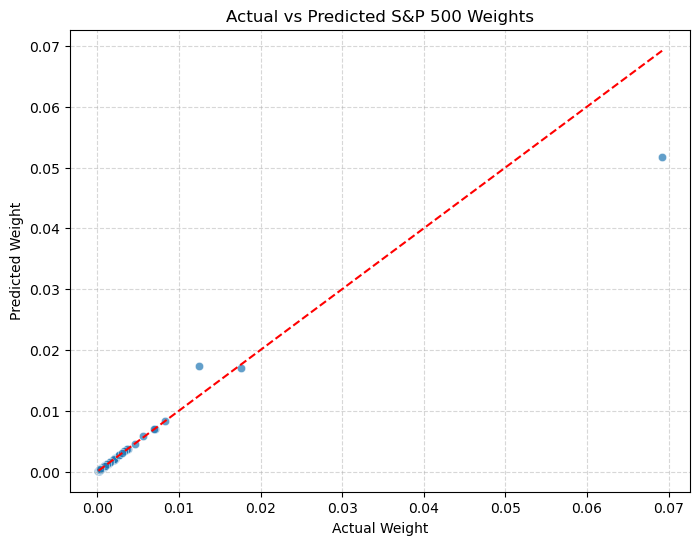

In [206]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted S&P 500 Weights")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

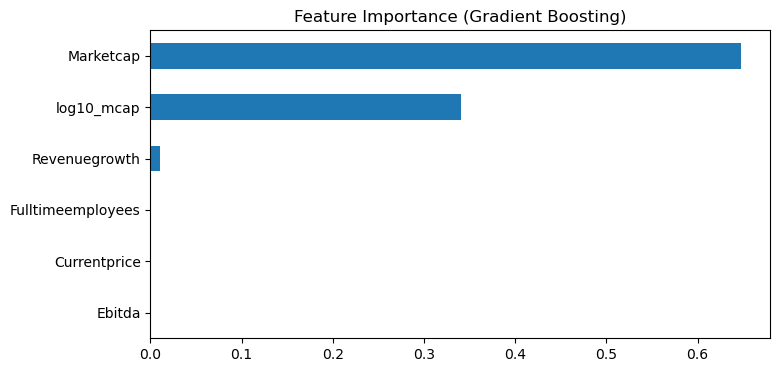

In [217]:
importance = pd.Series(gb.feature_importances_, index=features).sort_values(ascending=True)
importance.plot(kind='barh', figsize=(8,4), title='Feature Importance (Gradient Boosting)')
plt.show()

In [209]:
features = [
    'Marketcap',
    'Currentprice',
    'Ebitda',
    'Revenuegrowth',
    'Fulltimeemployees',
    'log10_mcap'      # this is already a great feature
]
target = 'Weight'

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

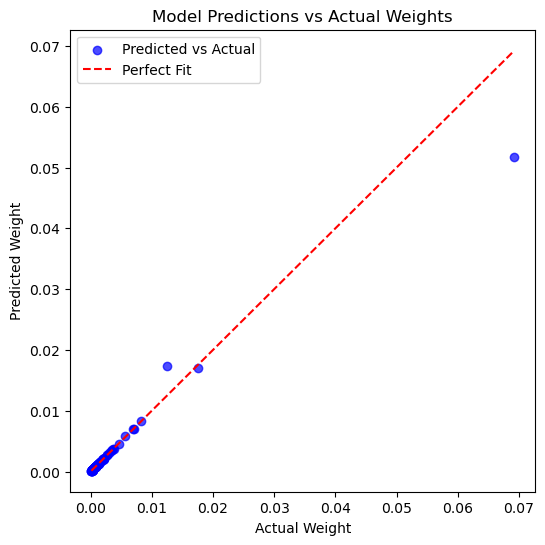

In [211]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')

plt.title("Model Predictions vs Actual Weights")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.legend()
plt.show()

In [212]:
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,log10_mcap,Outlier_Weight,Outlier_Mcaplog,Outlier_Any
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209,12.585102,True,True,True
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350,12.518356,True,True,True
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401,12.511358,True,True,True
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550,12.373837,True,True,True
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309,12.371368,True,True,True


In [213]:
top_marketcap = df.sort_values(by="Marketcap", ascending=False).head(10)

print(top_marketcap[['Sector', 'Industry', 'Marketcap']])

                   Sector                        Industry      Marketcap
0              Technology            Consumer Electronics  3846819807232
1              Technology                  Semiconductors  3298803056640
2              Technology       Software - Infrastructure  3246068596736
3       Consumer Cyclical                 Internet Retail  2365033807872
4  Communication Services  Internet Content & Information  2351625142272
5  Communication Services  Internet Content & Information  2351623045120
6  Communication Services  Internet Content & Information  1477457739776
7       Consumer Cyclical              Auto Manufacturers  1351627833344
8              Technology                  Semiconductors  1031217348608
9      Financial Services         Insurance - Diversified   978776031232


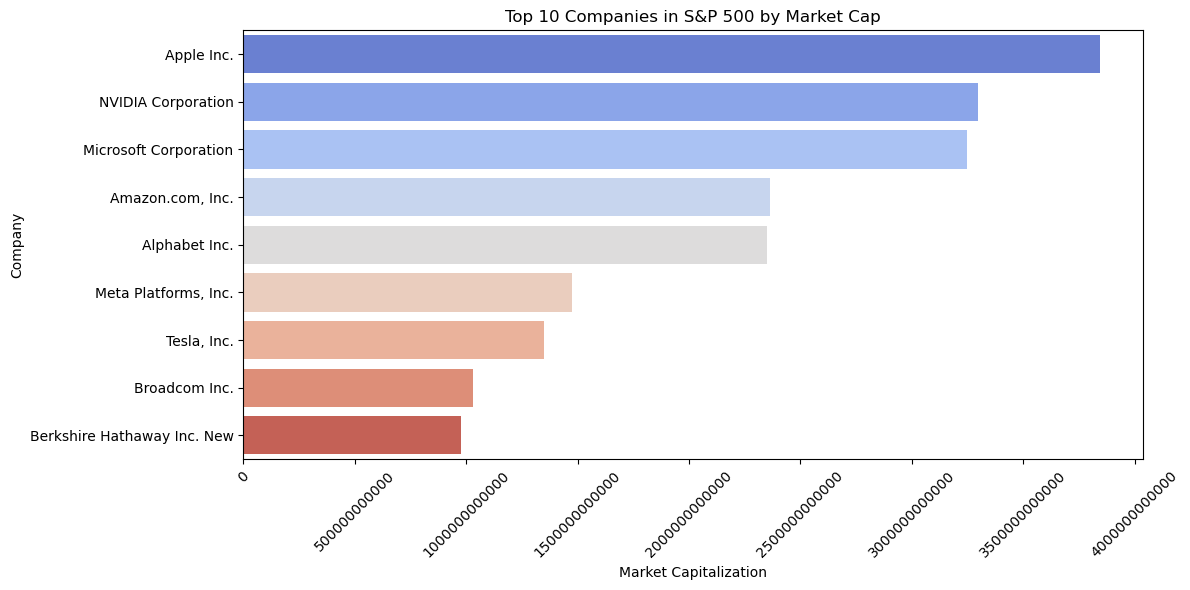

In [214]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marketcap', y='Shortname', data=top_marketcap.head(10), palette='coolwarm')
plt.title("Top 10 Companies in S&P 500 by Market Cap")
plt.xlabel("Market Capitalization")
plt.ylabel("Company")
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [215]:
top_price = df.sort_values(by="Weight", ascending=False).head(10)
print(top_price[['Sector', 'Industry', 'Weight']])

                   Sector                        Industry    Weight
0              Technology            Consumer Electronics  0.069209
1              Technology                  Semiconductors  0.059350
2              Technology       Software - Infrastructure  0.058401
3       Consumer Cyclical                 Internet Retail  0.042550
4  Communication Services  Internet Content & Information  0.042309
5  Communication Services  Internet Content & Information  0.042309
6  Communication Services  Internet Content & Information  0.026581
7       Consumer Cyclical              Auto Manufacturers  0.024317
8              Technology                  Semiconductors  0.018553
9      Financial Services         Insurance - Diversified  0.017609


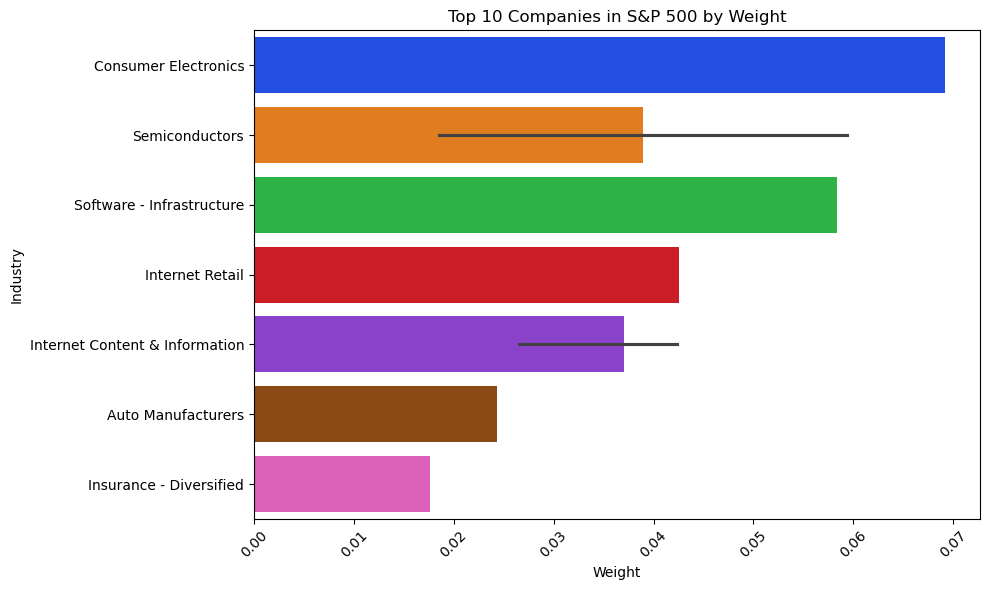

In [216]:
plt.figure(figsize = (10,6))
sns.barplot(x='Weight', y='Industry', data=top_price, palette='bright')
plt.title("Top 10 Companies in S&P 500 by Weight")
plt.xlabel("Weight")
plt.ylabel("Industry")
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()